In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt


In [2]:
num_inputs = 1  # input dimension
num_outputs = 1 # output dimension

sample_step_in_degrees = 6 # sine wave sampled each 6 degrees
num_steps = int(360/sample_step_in_degrees) # number of time steps for the rnn, also, it's sequence_lengths
num_hidden = 10    # use 5 cells/units in hidden layer
num_epochs = 5000  # 100 iterations
batch_size = 1    

In [24]:
def gen_data(distort=False, epoch=1):
    # generate sin(x)
    sinx = np.arange(0,360,sample_step_in_degrees) # 60 points every sequence
    sinx = np.sin(2*np.pi * sinx/360.0)/2  # sine wave between -0.5 and +0.5
    if distort:
        sinx = np.add(sinx, np.random.uniform(-0.1,0.1,size=num_steps))

    sinx2 = np.stack([sinx, sinx]).reshape(60*2)
    # add logx
    logx2 = 0.1*np.log(np.linspace(epoch, epoch+60*2,60*2))
    if logx2[0] == -np.inf:
        logx2[0]=1e-8
    X2 = sinx2 + logx2 
    X = X2[0:60]# take first 60
    X = X.reshape(num_steps,1) # num_steps  == 60

    #This actually shift X for 1 timestep, but X[0] needs to multiply next logx
    #y = np.concatenate((X[1:num_steps,:],X[0:1,:]))
    y = X2[1:61]

    X = X.reshape(batch_size,num_steps,1)
    y = y.reshape(batch_size,num_steps,1)
    
    a, = plt.plot(X.reshape(60,1), label="X", marker='+',c='b')
    b, = plt.plot(y.reshape(60,1), label="Y", marker='*',c='r')
    c, = plt.plot(logx2, label="LOG", marker='^',c='g')
    d, = plt.plot(logx2+sinx2, label="LOG+SIN", marker='o', c='y')
    e, = plt.plot(sinx2,label="SIN2", marker='.', c='b')
    plt.show([a,b,c,d])

    return (X,y)



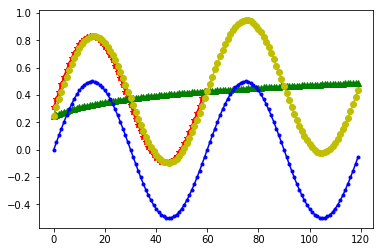

0.374699636687 0.374699636687 0.42836445144


In [25]:
x,y = gen_data(False, 12)
x = x.reshape(60)
y = y.reshape(60)
print(x[-1], y[-2], y[-1])